HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

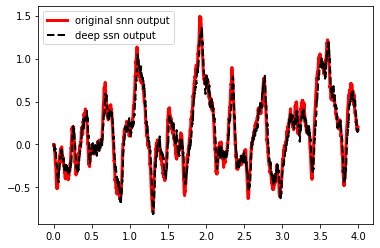

In [16]:
import nengo
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu

num_neurons_per_ensemble = 32
N=16

A = np.random.rand(N,N)*2 - np.ones((N,N))

B = np.random.rand(N)*2 - np.ones(N)

P, L, U = lu(A)

def gen_input(t):
    dat = np.zeros(N)
    for i in range(0, N):
        dat[i] = (np.sin((t-i)*i)**i)*4/N
    return dat

ntype = nengo.SpikingRectifiedLinear()
ntype.bias=0

with nengo.Network('model') as model:
    
    # Input node
    x = nengo.Node(output=gen_input)
    
    # y1 = Ax
    ax = nengo.networks.EnsembleArray(num_neurons_per_ensemble, N, neuron_type=ntype, label='Ax')
    ax.output.output = lambda t, x: x
    y1 = nengo.Node(size_in=1, label='y1=BAx')
    
    nengo.Connection(x, ax.input, transform=A)
    nengo.Connection(ax.output, y1, function=lambda s: np.dot(B, s))

    # y2 = PLUx
    ux = nengo.networks.EnsembleArray(num_neurons_per_ensemble, N, neuron_type=ntype, label='Ux')
    lux = nengo.networks.EnsembleArray(num_neurons_per_ensemble, N, neuron_type=ntype, label='LUx')
    plux = nengo.networks.EnsembleArray(num_neurons_per_ensemble, N, neuron_type=ntype, label='PLUx')
    y2 = nengo.Node(size_in=1, label='y1=BPLUx')
    ux.output.output = lambda t, x: x
    lux.output.output = lambda t, x: x
    plux.output.output = lambda t, x: x

    nengo.Connection(x, ux.input, transform=U)
    nengo.Connection(ux.output, lux.input, transform=L)
    nengo.Connection(lux.output, plux.input, transform=P)
    nengo.Connection(plux.output, y2, function=lambda s: np.dot(B, s))
    
    # Probes
    probe_y1 = nengo.Probe(y1, synapse=0.01)
    probe_y2 = nengo.Probe(y2, synapse=0.01)
    probe_x = nengo.Probe(x, synapse=0.1)
    
with nengo.Simulator(model) as sim:
    sim.run(4)
    
plt.figure()
plt.plot(sim.trange(), sim.data[probe_y1], color='red', linewidth=3, label='original snn output')
plt.plot(sim.trange(), sim.data[probe_y2], color='black', linestyle='dashed', linewidth=2, label='deep ssn output')
plt.legend()
plt.show()

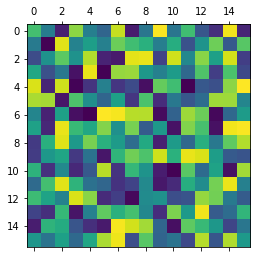

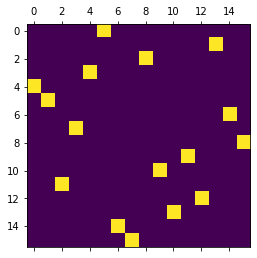

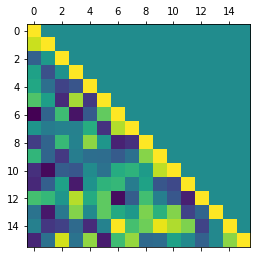

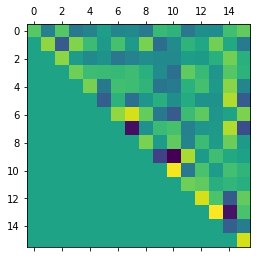

In [18]:
plt.matshow(A, label='A')
plt.matshow(P, label='P')
plt.matshow(L, label='L')
plt.matshow(U, label='U')